## Linear Regression model


In [232]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

class OurLinearRegression:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept

        self.Ws = []
        self.bs = []
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                      
        self.Ws.append(self.W[0][0])
        self.b -= learning_rate*delta_b 
        self.bs.append(self.b[0])
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.0000001):
        X = np.array(X)
        Y = np.array(Y).reshape(-1,1)

              
        for i in range(epochs):
            
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
        
        return self.W, self.b

    def predict(self, X):
        product = np.matmul(np.array(X),self.W)+self.b
        return product
    
    def mse(self, pred, y_test):
        return mean_squared_error(y_test, pred)

## Set de datos Arqui


In [233]:
# read first data set
df_2021_s1_grades = pd.read_csv('datasets/2021-s1.csv', sep=";")

# make sure that there are no null values that can affect the models
mask = df_2021_s1_grades.isnull()
#print(mask.sum())

df_2021_s1_grades = df_2021_s1_grades.drop('Tarea 2 Entrega 0.0%', axis=1)
df_2021_s1_grades = df_2021_s1_grades.drop('Proyecto Individual Viernes 0.0%', axis=1)
df_2021_s1_grades = df_2021_s1_grades.drop('Proyecto Individual Lunes 0.0%', axis=1)
df_2021_s1_grades = df_2021_s1_grades.drop('Exposición', axis=1)

# Arranging cols
col_Investi = df_2021_s1_grades.pop('Total: Investigación 5.0%')  # Cut col
df_2021_s1_grades.insert(14, 'Total: Investigación 5.0%', col_Investi)  # Insert col

# read second data set
df_2021_s2_grades = pd.read_csv('datasets/2021-s2.csv', sep=";")

# make sure that there are no null values that can affect the models
mask = df_2021_s2_grades.isnull()
#print(mask.sum())

df_2021_s2_grades = df_2021_s2_grades.drop('Examen 2 Práctico Ext 0.25%', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Proyecto Individual Entrega V 0.0%', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Proyecto Individual Entrega M 0.0%', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Entrega', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen 1', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen 2', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen 3', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen 4', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Total: Extra 2.0%', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Resumen', axis=1)
df_2021_s2_grades = df_2021_s2_grades.drop('Total: Extra 5 noviembre 1.0%', axis=1)

# read third data set
df_2022_s1_grades = pd.read_csv('datasets/2022-s1.csv', sep=";")

# make sure that there are no null values that can affect the models
mask = df_2022_s1_grades.isnull()
#print(mask.sum())

# delete students from robot project (only 6 in the whole data set)
df_2022_s1_grades = df_2022_s1_grades.drop([0, 4, 10, 20, 22, 26]) 

df_2022_s1_grades = df_2022_s1_grades.drop('Tarea 1 0.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Individual Entrega V 0.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Individual Entrega L 0.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Grupal 2 Anteproyecto 1.75%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Grup 2 Funcional Rob 11.38%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Proyecto Grupal 2 Docu Robot 4.37%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Entrega 0.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Evaluación 5.00%', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Evaluación', axis=1)
df_2022_s1_grades = df_2022_s1_grades.drop('Total: Puntaje extra 2%', axis=1)

# Arranging cols
col_Tarea2 = df_2022_s1_grades.pop('Tarea 2 3.75%')  # Cut col
df_2022_s1_grades.insert(5, 'Tarea 2 3.75%', col_Tarea2)  # Insert col

# read fourth data set
df_2022_s2_grades = pd.read_csv('datasets/2022-s2.csv', sep=";")

# make sure that there are no null values that can affect the models
mask = df_2022_s2_grades.isnull()
#print(mask.sum())

df_2022_s2_grades = df_2022_s2_grades.drop('Examen parcial 2 práctico repo 0.00%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Examen parcial 2 prác rep eval 0.00%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Tarea 2 0.00%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Proyecto Grupal 2 Anteproyecto 1.75%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Proyecto Grupal 1 Func Eval 13.12%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Proyecto Grupal 1 Docu Eval 4.38%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Entrega', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Charla 1 Simics 0.5%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Charla 2 Ronald 0.5%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Taller Simics 2%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Extra proyecto 1.75%', axis=1)
df_2022_s2_grades = df_2022_s2_grades.drop('Total: Extra 4.75%', axis=1)

# Merging four datasets frames into one frame

df_2021_s2_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)
df_2022_s1_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)
df_2022_s2_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)

df_arqui = pd.concat([df_2021_s1_grades, df_2021_s2_grades, df_2022_s1_grades, df_2022_s2_grades], axis=0, ignore_index=True)

df_arqui.replace(r'^\s*$', np.nan,regex=True, inplace=True)
df_arqui.fillna(0.0, inplace=True)
df_arqui = df_arqui.drop('Final', axis=1)


# Data preprocessing - outliner treatment
# eliminating data that is outside the normal values in each feature
features = ['Examen 1 15.0%', 
            'Proyecto Individual Docu 3.75%', 
            'Proyecto Individual Funcional 11.25%', 
            'Proyecto Grupal 1 Funcional 13.12%',
            'Proyecto Grupal 1 Docu 4.38%',
            'Taller 1']

for col in df_arqui.columns:
    if col not in features and col != 'Total: ':
        df_arqui = df_arqui.drop(col, axis=1)

l_limit_perc = 0.01
h_limit_perc = 0.99

df_arqui = df_arqui.astype(float)

for feature in features:
    low_limit = df_arqui[feature].quantile(l_limit_perc)
    high_limit = df_arqui[feature].quantile(h_limit_perc)
    df_arqui = df_arqui.loc[(df_arqui[feature] >= low_limit) & (df_arqui[feature] <= high_limit)]

# feature engineering
# normalization of the data
#for feature in features:
#    df_arqui[feature] = (df_arqui[feature]-df_arqui[feature].mean())/df_arqui[feature].std()
#
#df_arqui['Total: '] = (df_arqui['Total: ']-df_arqui['Total: '].mean())/df_arqui['Total: '].std()

# Define training and test sets using stratify
X = df_arqui[features]
Y = df_arqui['Total: ']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=40)

X_train = pd.concat([X_train, X_train], axis= 0)
y_train = pd.concat([y_train, y_train], axis= 0)

df_arqui.head(5)

C:\Users\Juan Navarro\AppData\Local\Temp\ipykernel_30260\549253117.py:83: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_2021_s2_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)
C:\Users\Juan Navarro\AppData\Local\Temp\ipykernel_30260\549253117.py:84: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_2022_s1_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)
C:\Users\Juan Navarro\AppData\Local\Temp\ipykernel_30260\549253117.py:85: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_2022_s2_grades.set_axis(df_2021_s1_grades.columns, axis=1, inplace=True)


,Examen 1 15.0%,Proyecto Individual Docu 3.75%,Proyecto Individual Funcional 11.25%,Proyecto Grupal 1 Funcional 13.12%,Proyecto Grupal 1 Docu 4.38%,Taller 1,Total:
0,53.3,77.0,100.0,100.0,100.0,80.0,80.2
1,12.6,0.0,0.0,0.0,0.0,40.0,2.5
2,49.6,100.0,100.0,45.0,100.0,100.0,80.8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61.6,100.0,100.0,100.0,100.0,100.0,82.1


* Prueba de la regresión


MSE:  887.4386513590105
Value of b over iterations
Value of w[0] over iterations


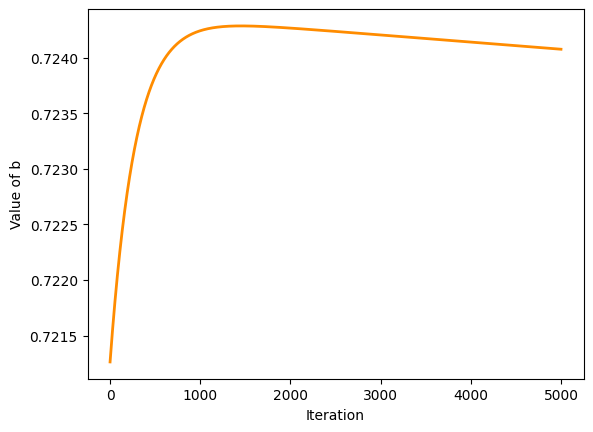

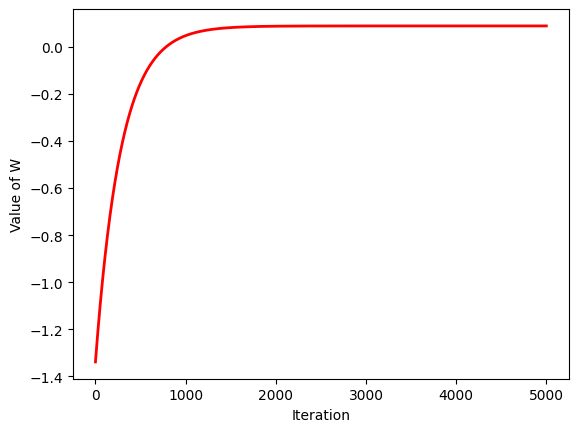

,Real grade,Predicted Grade,Examen 1 15.0%,Proyecto Individual Docu 3.75%,Proyecto Individual Funcional 11.25%,Proyecto Grupal 1 Funcional 13.12%,Proyecto Grupal 1 Docu 4.38%,Taller 1
51,81.03,55.911549,24.2,92.0,85.0,97.0,100.0,33.3
80,87.62,52.011418,58.2,100.0,100.0,88.3,100.0,63.3
45,80.09,63.520099,26.9,100.0,86.7,75.0,100.0,76.7
15,67.90,118.075591,38.5,46.0,34.0,60.0,100.0,80.0
67,0.00,0.724077,0.0,0.0,0.0,0.0,0.0,0.0
11,75.20,87.132178,60.7,92.3,70.8,60.0,100.0,100.0
39,79.03,61.203880,37.2,100.0,90.0,75.0,92.3,100.0
64,0.90,21.981559,0.0,0.0,0.0,0.0,0.0,60.0
38,76.11,96.194874,23.1,92.3,62.0,75.0,100.0,100.0
61,76.16,65.288170,29.4,100.0,85.0,70.0,100.0,80.0


In [234]:
# instantiate and train the model
reg = OurLinearRegression(n_features=len(features))
reg.train(X_train, y_train, epochs=5000, learning_rate=0.00000001)

# predict the test values
pred = reg.predict(np.array(X_test))

title_row = ['Real grade', 'Predicted Grade']
df_results = pd.DataFrame(columns=title_row)
df_results[title_row[0]] = y_test[:20]
df_results[title_row[1]] = pred[:20]

df_results = pd.concat([df_results, X_test[:20]], axis=1)

print("MSE: ", reg.mse(pred, y_test))

print("Value of b over iterations")
iters = [i for i in range(0, len(reg.bs))]
plt.figure()
plt.plot(iters, reg.bs, color='darkorange', lw = 2)
plt.xlabel('Iteration')
plt.ylabel('Value of b')

print("Value of w[0] over iterations")
iters = [i for i in range(0, len(reg.Ws))]
plt.figure()
plt.plot(iters, reg.Ws, color='red', lw = 2)
plt.xlabel('Iteration')
plt.ylabel('Value of W')

plt.show()

df_results.head(20)